This notebook is used to explore using tensorflow to solve simple optimization problems (i.e. simple curve fitting) to test before using in the pressure solve in notebook 110121BAY0938

In [99]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [100]:
xx = np.arange(0,1,0.01)
N = xx.shape[0]
xx.resize((N,1)) #in place reshaping for use as input for tensorflow
yy = xx*5
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer( input_shape=(1,) ),
    tf.keras.layers.Dense(1, use_bias = False) 
    ])

#loss function:

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate = 1)
train_loss = tf.keras.metrics.Mean(name='train_loss')


In [101]:
#using gradient tape for optimization:
@tf.function
def train_step(xx,yy):
    with tf.GradientTape() as tape:
        predictions = model(xx,training = True)
        loss = loss_fn(yy,predictions)
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

    train_loss(loss)

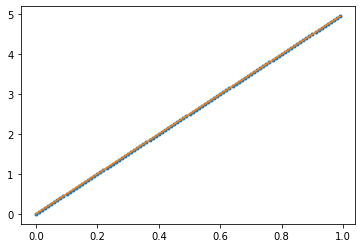

In [102]:
EPOCHS = 500
for epoch in range(EPOCHS):
    #Reset metrics at the start of next epoch
    train_loss.reset_states()
    
    train_step(xx,yy)
    #print(loss_fn(yy,model(xx)).numpy())

plt.plot(xx,yy,'.')
plt.plot(xx,model(xx).numpy())